# Module 1 - In this jupyter notebook, resampling and masking are undertaken as part of preparing the data for further analyses.
* Step 1a - Import modules/libraries
* Step 1b - Resampling raster data and
* Step 1c - Clip to boundary (using shapefile) and/or filter non-cropped area (masking using raster file)

**=====================================================================================================================**

![title](https://raw.githubusercontent.com/wateraccounting/WAPORWP/master/Notebooks/img/Fig1_1.png)

**=====================================================================================================================**

Before you start running this Notebook, make sure you have the following information:

*   WaPOR Reference ET and PCP for your case study for the period you want to do the analyses. For small areas make sure you download the data using a bounding box. Use this script for downloading the data: [Downloading_WaPORv3_data script](https://github.com/wateraccounting/WaPORMOOC/tree/main/1_WaPOR_download_colab).

*   Sample of a TIFF file with the resolution you want to do the analyses
*   Shapefile of the area of interest (AOI)
*   Optional: land cover classification (LCC) map if you want to mask out certain land use classes. In the example case, we downloaded the WaPORv2 L2 LCC map for the area [provided on github](https://github.com/wateraccounting/WaPORIPA/blob/main/data/Wad_Helal_LCC.tif)


## Step 1a - Import modules/libraries

In [ ]:
import os                             # a module for interacting with the operating system
import glob                           # used to retrieve files/pathnames matching a specified pattern
import matplotlib.pyplot as plt       # is a plotting library used for 2D graphics in python
import numpy as np                    # stands for 'Numerical Python, is a python library used for scientific computing with arrays
from osgeo import ogr, gdal
import subprocess


In [ ]:
#To upload modules.zip (importing GISfunctions to do the calculations).
from google.colab import files
uploaded = files.upload()

Saving Modules.rar to Modules.rar


In [ ]:
# unzip the uploaded zipfile
!unzip '/content/data.zip' -d '/content/'

In [ ]:
os.chdir(os.path.join(os.path.split(os.getcwd())[0], "/content/Modules"))
from GIS_functions import GIS_function as gis

# Step 1b - Reample raster data

After downloading RET and PCP using [Downloading_WaPORv3_data script](https://github.com/wateraccounting/WaPORMOOC/tree/main/1_WaPOR_download_colab), the data needs to be resampled to the same resolution as the NPP and AETI data. *Download using bounding box (bb) not shapefile to avoid empty data.* You need an example file (tiff) with this resolution at hand.

## * Import the input data and sample of resolution

Import downloaded RET and PCP files

In [ ]:
#To upload modules.rar.
from google.colab import files
uploaded = files.upload()

In [ ]:

# unzip the uploaded zipfile
!unzip '/content/data.zip' -d '/content/'

Import the example file with the required resolution

In [ ]:
#To upload sample resolution file.
from google.colab import files
uploaded = files.upload()

Saving sample_res.tif to sample_res.tif


## i) Resample Reference ET

In [ ]:

source_file   = '/content/sample_res.tif'                        # Read gdal info of template raster file
target_folder = '/content/content/output/L1-RET-E'               # data to be resampled
target_fhs    = glob.glob(target_folder + '/*.tif')

source_file, target_folder, target_fhs

## The size and shape of the raster files

In [ ]:
## The size and shape of the raster files
template   = gis.OpenAsArray(source_file, nan_values=True)
original   = gis.OpenAsArray(target_fhs[0], nan_values=True)

print ('The size & shape of the template raster      =', template.size,  '&', template.shape)
print ('The size & shape of the data to be resampled =', original.size,  '&', original.shape)

The size & shape of the template raster      = 347133 & (461, 753)
The size & shape of the data to be resampled = 8 & (2, 4)


## ** Make or connect with the directory the output folder

In [ ]:
output_folder = '/content/content/resampled/L1-RET-E_resampled'

## Make one if the folder does not exit
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_folder

'/content/content/resampled/L1-PCP-E_resampled'

## *** Resample raster data

In [ ]:
Resample = gis.MatchProjResNDV (source_file, target_fhs, output_folder, resample = 'near', dtype = 'float32')

In [ ]:
## Check the size and shape of the resampled raster files
Resampled   = "/content/content/resampled/L1-RET-E_resampled/bb_L1-RET-E_NONE_day_2022-01-01.tif"
resampled   = gis.OpenAsArray(Resampled , nan_values=True)

print ('The size & shape of the resampled data =', resampled.size,  '&', resampled.shape)

The size & shape of the resampled data = 347133 & (461, 753)


## ii) Resample Precipitation layers

In [ ]:
source_file   = '/content/sample_res.tif'     # Read gdal info of template raster file
target_folder = '/content/content/output/L1-PCP-E'                      # data to be resampled
target_fhs    = glob.glob(target_folder + '/*.tif')

source_file, target_folder, target_fhs

## The size and shape of the raster files

In [ ]:
## The size and shape of the raster files
template   = gis.OpenAsArray(source_file, nan_values=True)
original   = gis.OpenAsArray(target_fhs[0], nan_values=True)

print ('The size & shape of the template raster      =', template.size,  '&', template.shape)
print ('The size & shape of the data to be resampled =', original.size,  '&', original.shape)

## ** Make or connect with the directory the output folder

In [ ]:
output_folder = '/content/content/resampled/L1-PCP-E_resampled'

## Make one if the folder does not exit
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_folder

'D:\\Github\\WAPORWP\\Data\\1_L1_PCP_D_resampled'

## *** Resample raster data

In [ ]:
Resample = gis.MatchProjResNDV (source_file, target_fhs, output_folder, resample = 'near', dtype = 'float32')

In [ ]:
## Check the size and shape of the resampled raster files
Resampled   = "/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-01.tif"
resampled   = gis.OpenAsArray(Resampled , nan_values=True)

print ('The size & shape of the resampled data =', resampled.size,  '&', resampled.shape)

The size & shape of the resampled data = 1458022 & (1159, 1258)




# Step 1c - Filiter non-croppped area using land cover map and project boundary

### Land cover map
In WaPOR LCC layer, pixel value **42** represents irrigated cropland (See https://wapor.apps.fao.org/catalog/2/L2_LCC_A).

![title](https://raw.githubusercontent.com//wateraccounting/WAPORWP/master/Notebooks/img/Fig1_2.png)

### Poject boundary  --- convert shapefile to raster

In [ ]:
#To upload boundary shape file.
from google.colab import files
uploaded = files.upload()

Saving Wad_Helal.cpg to Wad_Helal (2).cpg
Saving Wad_Helal.dbf to Wad_Helal (2).dbf
Saving Wad_Helal.prj to Wad_Helal (2).prj
Saving Wad_Helal.qmd to Wad_Helal (2).qmd
Saving Wad_Helal.shp to Wad_Helal (2).shp
Saving Wad_Helal.shx to Wad_Helal (2).shx


''

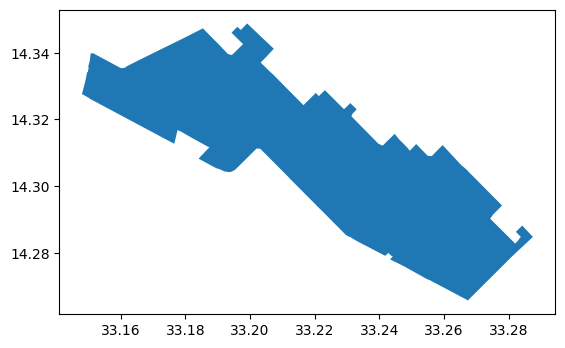

In [ ]:
import geopandas as gpd
gdf = gpd.read_file('/content/Modules/Wad_Helal.shp')
# Plotting the area
gdf.plot()
gdf
,

In [ ]:
# read shapefile and reference raster files


InputVector = r"/content/Modules/Wad_Helal.shp"             # the shapefile of the project
RefImage    = r"/content/sample_res.tif" # Reference raster to fix the the pixel size
OutputImage = r'/content/Wad_Helal_masked'            # name the output raster file
burnVal     = 1                                                         #value for the output image pixels

In [ ]:
# A script to rasterise a shapefile to the same projection & pixel resolution as a reference image.
gdalformat = 'GTiff'
datatype = gdal.GDT_Byte


##########################################################
# Get projection info from reference image
Image = gdal.Open(RefImage, gdal.GA_ReadOnly)

# Open Shapefile
Shapefile = ogr.Open(InputVector)
Shapefile_layer = Shapefile.GetLayer()

# Rasterise
print("Rasterising shapefile...")
Output = gdal.GetDriverByName(gdalformat).Create(OutputImage, Image.RasterXSize, Image.RasterYSize, 1, datatype, options=['COMPRESS=LZW'])
Output.SetProjection(Image.GetProjectionRef())
Output.SetGeoTransform(Image.GetGeoTransform())

# Write data to band 1
Band = Output.GetRasterBand(1)
Band.SetNoDataValue(0)
gdal.RasterizeLayer(Output, [1], Shapefile_layer, burn_values=[burnVal])

# Close datasets
Band = None
Output = None
Image = None
Shapefile = None

# Build image overviews
subprocess.call("gdaladdo --config COMPRESS_OVERVIEW DEFLATE "+OutputImage+" 2 4 8 16 32 64", shell=True)
print("Done.")

Rasterising shapefile...
Done.


In [ ]:
OutputImage

'/content/Wad_Helal_masked'

## i) Import the input data

In [ ]:

# reference evapotranspiration and precipitation


input_folderPCP  = '/content/content/resampled/L1-PCP-E_resampled'
input_fhsPCP     = glob.glob(input_folderPCP + '/*.tif')

input_folderRET  = '/content/content/resampled/L1-RET-E_resampled'
input_fhsRET     = glob.glob(input_folderRET + '/*.tif')

# Masks: landcover layers and the shape of the project area
#input_LCCfolder  = os.path.join(dir_proj, dir_data, "WAPOR.v2_yearly_L2_LCC_A")
#LCC_tifs         = glob.glob(input_LCCfolder + '/*.tif')

ProArea = gis.OpenAsArray(r'/content/Wad_Helal_masked', nan_values=True)  # the project boundary/area (tif)
input_fhsPCP

['/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-14.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-11.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-06.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-17.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-07.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-24.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-16.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-29.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-02.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-25.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-19.tif',
 '/content/content/resampled/L1-PCP-E_resampled/bb_L1-

## ii) Output folder: Make one or connect to the existing one

In [ ]:
output_folderPCP    = '/content/content/filtered/L1-PCP-E_filtered'
output_folderRET  = '/content/content/filtered/L1-RET-E_filtered'


## Make one if the folder does not exit
if not os.path.exists(output_folderRET):
    os.makedirs(output_folderRET)
if not os.path.exists(output_folderPCP):
    os.makedirs(output_folderPCP)

output_folderPCP, output_folderRET

('/content/content/filtered/L1-PCP-E_filtered',
 '/content/content/filtered/L1-RET-E_filtered')

#### Plot project area

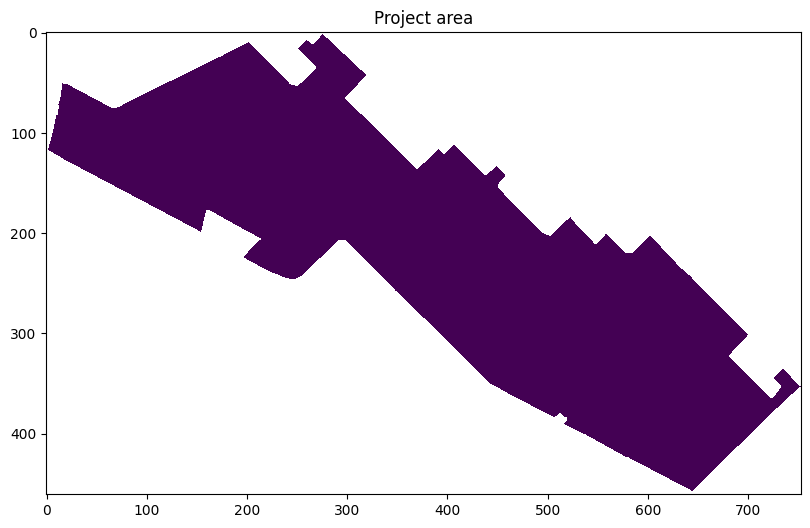

In [ ]:
### Plot project area
Projectboundary = ProArea

# Plot
plt.figure(figsize = (12,6))
plt.imshow(Projectboundary)
plt.title('Project area')
plt.show();

#### Plot raster layer (before removing the non-cropped area)

In [ ]:
input_fhsPCP[0]

'/content/content/resampled/L1-PCP-E_resampled/bb_L1-PCP-E_NONE_day_2022-01-14.tif'

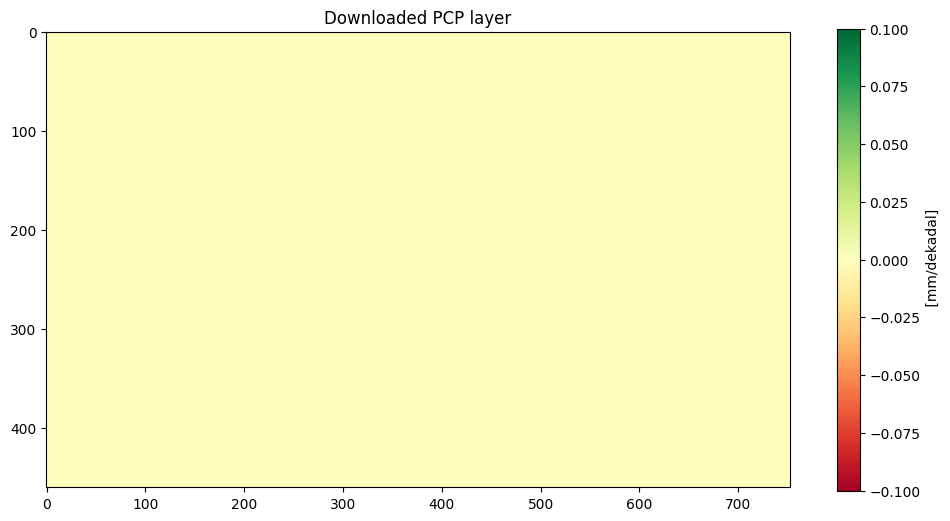

In [ ]:
# Plot PCP layer
PCP_tif = gis.OpenAsArray(input_fhsPCP[0],nan_values=True)

plt.figure(figsize = (12,8))
plt.imshow(PCP_tif, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('Downloaded PCP layer')
plt.show()

In [ ]:

# Plot PCP layer
PCP_tif = gis.OpenAsArray(input_fhsPCP[0],nan_values=True)

plt.figure(figsize = (12,8))
plt.imshow(PCP_tif, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('Downloaded PCP layer')
plt.show()

NameError: name 'output_fhsPCP' is not defined

#### Plot raster layer on irrigated cropped land (masking out non-irrigated cropped land)

In [ ]:
LCC_tifs[0]

'D:\\Github\\WAPORWP\\Data\\WAPOR.v2_yearly_L2_LCC_A\\L2_LCC_09.tif'

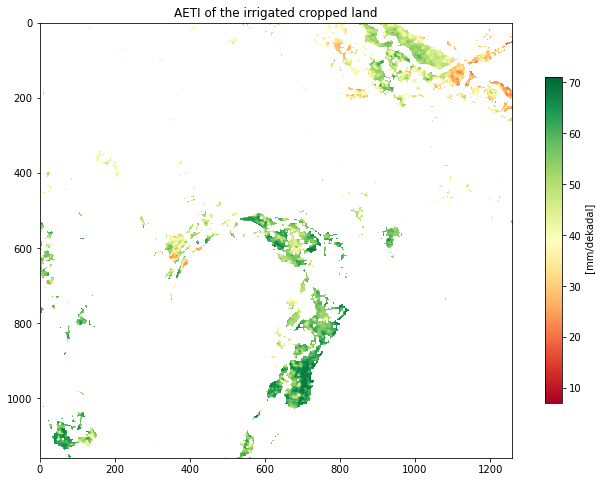

In [ ]:
# Mask out the non-irrigated cropped land
LCC       = gis.OpenAsArray(LCC_tifs[0],nan_values=True)  # land cover map
AETI_crop = np.where((LCC==42), AETI_tif,np.nan)          # Show AETI on irrigated crop land, which has land class value of 42

# Plot AETI on irrigated cropped land
plt.figure(figsize = (12,8))
plt.imshow(AETI_crop, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('AETI of the irrigated cropped land')
plt.show()

#### Plot raser layer on  irrigated cropped land and within the boundary of the scheme

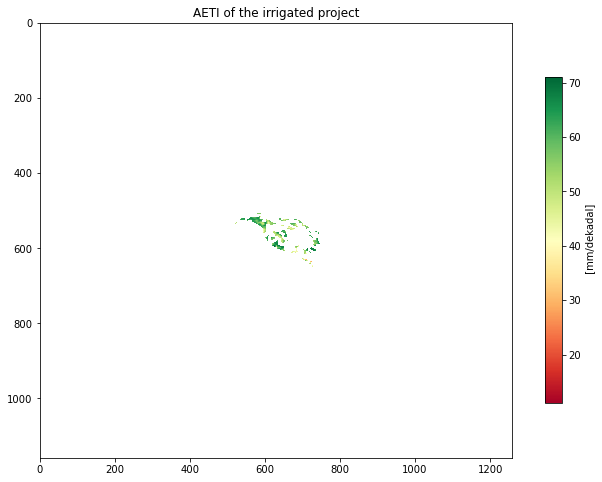

In [ ]:
# Mask out the non-irrigated cropped land and area outside the scheme boundary
AETI_boundary = np.where((LCC==42)& (ProArea==1),AETI_tif,np.nan) # masking out the non-irrigated crop land and areas outside the projedct area

# Plot
plt.figure(figsize = (12,8))
plt.imshow(AETI_boundary, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/dekadal]')
plt.title('AETI of the irrigated project')
plt.show()

## iii) Filter non-croppped area using land cover map and project boundary

* LCC     = for instance # 42 is the land cover class of crop land under irrigation water management
* ProArea = 1 the raster value of the project area in tiff format

### Filter precipitation layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsPCP[0]
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for PCPfh in input_fhsPCP:
    #for LCCfh in LCC_tifs:
    PCP = gis.OpenAsArray(PCPfh, nan_values=True)
        #LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        #basename1  = os.path.basename(PCPfh).split('_')[2].split('.')[0]    #L2_T_0901.tif, 0901.tif, 0901
        #basename1  = int(str(basename1)[:2])                              # 09

        #basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]   #L2_LCC_09.tif, 09.tif, 09

        #if basename1 == int(basename2):     #compare the year of the LCC and the raster layer (T)

            # masking out the non-irrigated crop land and areas outside the projedct area
            #PCP   = np.where((LCC==42)& (ProArea==1),PCP,np.nan)
    PCP   = np.where((ProArea==1),PCP,np.nan)

            # update the file name, and save into output folder
    basename  = os.path.basename(PCPfh)
    output_fn = os.path.join(output_folderPCP, basename)
    gis.CreateGeoTiff(output_fn, PCP, driver, NDV, xsize, ysize, GeoT, Projection)

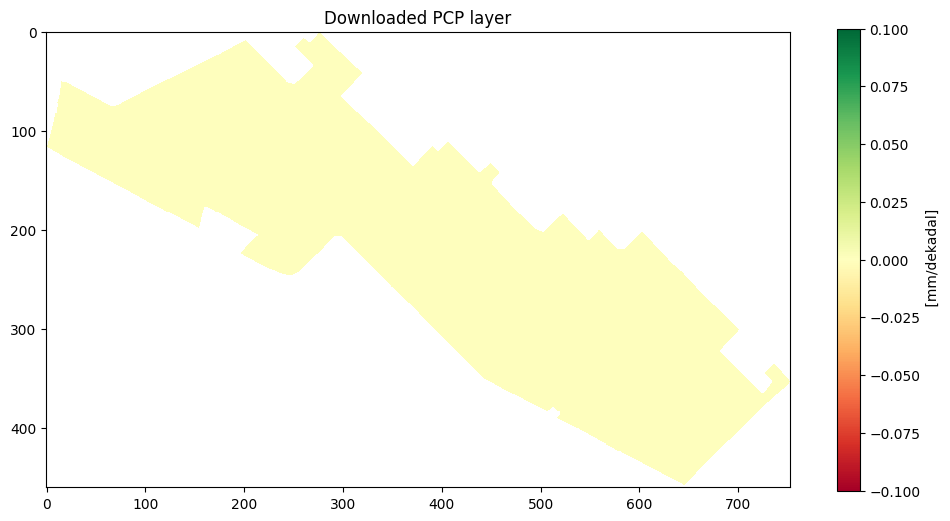

In [ ]:
#visualise the raster output
PCP_tif = '/content/content/filtered/L1-PCP-E_filtered/bb_L1-PCP-E_NONE_day_2022-01-01.tif'      # Path to seasonal file
plt.figure(figsize = (12,8))
plt.imshow(PCP, cmap='RdYlGn')
plt.colorbar(shrink=0.75, label=' [mm/day]')
plt.title('Clipped PCP layer')
plt.show()

### Filter Reference ET layers

In [ ]:
# collecting Geoinfo such as projection, the x and y axis
in_fh = input_fhsRET[0]
driver, NDV, xsize, ysize, GeoT, Projection = gis.GetGeoInfo(in_fh)
spatial_extent = (GeoT[0], GeoT[0] + GeoT[1] * xsize, GeoT[3] + GeoT[5] * ysize, GeoT[3])  # get spatial extent of raster

for RETfh in input_fhsRET:
    for LCCfh in LCC_tifs:
        RET = gis.OpenAsArray(RETfh,  nan_values=True)
        LCC = gis.OpenAsArray(LCCfh, nan_values=True)
        basename1  = os.path.basename(RETfh).split('_')[2].split('.')[0]
        basename1  = int(str(basename1)[:2])

        basename2  = os.path.basename(LCCfh).split('_')[2].split('.')[0]

        if basename1 == int(basename2):

            # masking out the non-irrigated crop land and areas outside the projedct area
            #RET = np.where((LCC==42)& (ProArea==1),RET,np.nan)
            RET = np.where((LCC==42)& (ProArea==1),RET,np.nan)
            # update the file name, and save into output folder
            basename  = os.path.basename(RETfh)
            output_fn = os.path.join(output_folderRET, basename)
            gis.CreateGeoTiff(output_fn, RET, driver, NDV, xsize, ysize, GeoT, Projection)